# Assignment 16 : KNN

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## 1. Data Analysis and Preprocessing

The first step in any machine learning task is to understand and prepare your data. For the `Zoo.csv` dataset, this would involve:

  * **Loading the data**: You would load the CSV file into a pandas DataFrame.
  * **Initial Inspection**: You would use `df.head()` to see the first few rows and `df.info()` to check data types, a number of non-null values, and column names.
  * **Handling `animal name`**: The `animal name` column is an identifier and should not be used as a feature for the model. It would be dropped.
  * **Separating Features and Target**: The features (`X`) would be all columns except `animal name` and `type`. The target variable (`y`) would be the `type` column.

In [2]:
df = pd.read_csv('Zoo.csv')

In [3]:
df= df.drop('animal name',axis=1)

In [4]:
X=df.drop('type',axis=1)
y=df['type']

In [5]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [6]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

## 2. Splitting the Dataset

To properly evaluate a machine learning model, you must split your data into a training set and a testing set. The training set is used to "teach" the model, and the testing set is used to evaluate its performance on unseen data. The common practice is to use `train_test_split` from `scikit-learn`. The split ratio you requested is 80% for training and 20% for testing.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
len(X_train)

80

In [9]:
len(X_test)

21

## 3. Implementing and Evaluating KNN

The next step is to choose an appropriate value for K and evaluate the model's performance. A common approach is to iterate through a range of `k` values and select the one that yields the best accuracy on the test set.

  * **Choosing K**: You would iterate through `k` values (e.g., from 1 to 20) and calculate the accuracy for each value. The `optimal_k` is the one that results in the highest accuracy.
  * **Training and Prediction**: Once `optimal_k` is identified, you would train the `KNeighborsClassifier` with this value.
  * **Evaluation**: You would use `classification_report` to get a detailed breakdown of the model's performance, including accuracy, precision, recall, and F1-score.


In [10]:
accuracy_scores = []
k_values = range(1, 21)

In [11]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)

In [12]:
optimal_k = k_values[np.argmax(accuracy_scores)]
optimal_k

1

In [13]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn_optimal.predict(X_test)
report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## 4. Visualizing the Decision Boundaries

Visualizing decision boundaries is a great way to understand how a classifier works. Since the dataset has many features, a full visualization is not possible. Instead, you can select two key features to create a 2D plot. This example uses `toothed` and `backbone` as they are binary and easy to interpret.

The plot shows a colored background representing the predicted class for each point on the grid, with the actual data points overlaid.


In [15]:
X_vis = df[['toothed', 'backbone']].values
y_vis = df['type'].values

In [16]:
knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_vis, y_vis)

KNeighborsClassifier(n_neighbors=1)

In [18]:
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [19]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

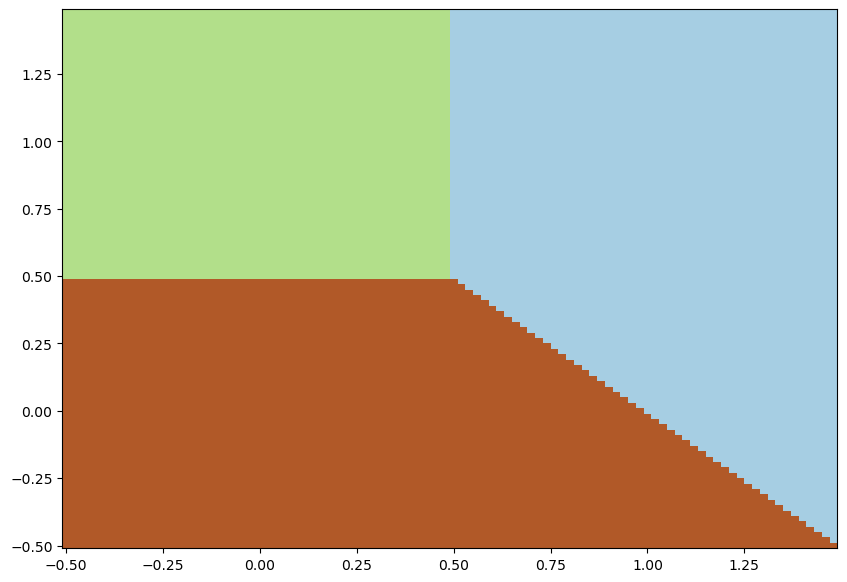

In [20]:
# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')


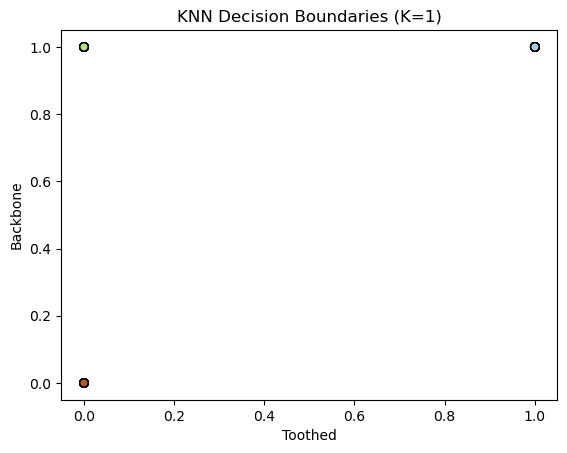

In [21]:
# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Toothed')
plt.ylabel('Backbone')
plt.title(f'KNN Decision Boundaries (K={optimal_k})')
plt.show()

### Interview Questions

#### 1\. What are the key hyperparameters in KNN?

The two most important hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

  * **`n_neighbors` (K)**: This is the number of neighbors to consider when making a prediction. A small `k` can make the model sensitive to noise and outliers, leading to high variance. A large `k` can smooth out the decision boundaries, but might not capture local patterns, leading to high bias. Choosing an optimal `k` is crucial for performance.
  * **`metric`**: This defines the distance metric used to calculate the distance between data points. The choice of metric can significantly impact the model's performance, especially with different types of data.

#### 2\. What distance metrics can be used in KNN?

The choice of distance metric depends on the nature of the data. Some of the most common metrics used in KNN are:

  * **Euclidean Distance**: This is the most common metric. It calculates the straight-line distance between two points in Euclidean space. It is a good default choice for many problems, especially with continuous features. The formula for two points $p$ and $q$ in $n$-dimensional space is:
    $d(p, q) = \\sqrt{\\sum\_{i=1}^{n} (q\_i - p\_i)^2}$

  * **Manhattan Distance** (also known as City Block Distance): This metric calculates the distance by summing the absolute differences of the coordinates. It's often used when the features are on a grid-like structure or if you want to reduce the effect of outliers. The formula is:
    $d(p, q) = \\sum\_{i=1}^{n} |q\_i - p\_i|$

  * **Minkowski Distance**: This is a generalization of both Euclidean and Manhattan distances. It is a parameterized metric where the parameter `p` determines the type of distance. When $p=1$, it is the Manhattan distance, and when $p=2$, it is the Euclidean distance. The formula is:
    $d(p, q) = (\\sum\_{i=1}^{n} |q\_i - p\_i|^p)^{\\frac{1}{p}}$